In [1]:
%matplotlib inline

In [2]:
from dipy.reconst.dti import fractional_anisotropy, color_fa
from argparse import ArgumentParser
from scipy import ndimage
import os
import re
import numpy as np
import nibabel as nb
import sys
import matplotlib

#matplotlib.use('Agg')  # very important above pyplot import
import matplotlib.pyplot as plt

In [3]:
cd

/root


In [4]:
ls

Aut1367.nii                        final.ipynb
Final Downsampled.ipynb            index.html
Final Downsampled2.ipynb           miniTIFF/
Final Notebook.ipynb               new/
Full Brain Less Downsampled.ipynb  pipeline.ipynb
Full Brain.ipynb                   prototype.ipynb
TIFF_stack/                        result/
Untitled-Copy1.ipynb               sample0.tiff
Untitled.ipynb                     sample1.tiff
bigtiff/                           sample2.tiff
downsampled/                       sample3.tiff
downsampled.nii                    seelviz/
downsampled0.tiff                  supernew/
downsampled1.tiff                  tensor_rgb_upper.nii.gz
downsampled2.tiff                  tmp/
downsampled3.tiff                  v100_ch0_tensorfsl_dogsig1_gausig2.3.nii


In [5]:
cd supernew/

/root/supernew


In [6]:
ls

dogsigma_0gausigma_0tensorfsl.nii  downsampled27.tiff  downsampled46.tiff
downsampled0.tiff                  downsampled28.tiff  downsampled47.tiff
downsampled1.tiff                  downsampled29.tiff  downsampled48.tiff
downsampled10.tiff                 downsampled3.tiff   downsampled49.tiff
downsampled11.tiff                 downsampled30.tiff  downsampled5.tiff
downsampled12.tiff                 downsampled31.tiff  downsampled50.tiff
downsampled13.tiff                 downsampled32.tiff  downsampled51.tiff
downsampled14.tiff                 downsampled33.tiff  downsampled52.tiff
downsampled15.tiff                 downsampled34.tiff  downsampled53.tiff
downsampled16.tiff                 downsampled35.tiff  downsampled54.tiff
downsampled17.tiff                 downsampled36.tiff  downsampled55.tiff
downsampled18.tiff                 downsampled37.tiff  downsampled56.tiff
downsampled19.tiff                 downsampled38.tiff  downsampled57.tiff
downsampled2.tiff                  down

In [7]:
from dipy.reconst.dti import from_lower_triangular


In [8]:
ls

dogsigma_0gausigma_0tensorfsl.nii  downsampled27.tiff  downsampled46.tiff
downsampled0.tiff                  downsampled28.tiff  downsampled47.tiff
downsampled1.tiff                  downsampled29.tiff  downsampled48.tiff
downsampled10.tiff                 downsampled3.tiff   downsampled49.tiff
downsampled11.tiff                 downsampled30.tiff  downsampled5.tiff
downsampled12.tiff                 downsampled31.tiff  downsampled50.tiff
downsampled13.tiff                 downsampled32.tiff  downsampled51.tiff
downsampled14.tiff                 downsampled33.tiff  downsampled52.tiff
downsampled15.tiff                 downsampled34.tiff  downsampled53.tiff
downsampled16.tiff                 downsampled35.tiff  downsampled54.tiff
downsampled17.tiff                 downsampled36.tiff  downsampled55.tiff
downsampled18.tiff                 downsampled37.tiff  downsampled56.tiff
downsampled19.tiff                 downsampled38.tiff  downsampled57.tiff
downsampled2.tiff                  down

In [9]:
img = nb.load('dogsigma_0gausigma_0tensorfsl.nii')

In [10]:
data = img.get_data()


In [11]:
output = from_lower_triangular(data)

In [12]:
output_ds = output[4250:4300, 250:300, :, :, :]

In [13]:

print output.shape
print output_ds.shape

(60, 92, 60, 3, 3)
(0, 0, 60, 3, 3)


In [14]:
FA = fractional_anisotropy(output)

In [15]:
FA = np.clip(FA, 0, 1)

In [16]:
FA[np.isnan(FA)] = 0

In [17]:

print FA.shape

(60, 92, 60, 3)


In [18]:

from dipy.reconst.dti import decompose_tensor

In [19]:
evalues, evectors = decompose_tensor(output)

In [20]:
print evectors[..., 0, 0].shape
print evectors.shape[-2:]

(60, 92, 60)
(3, 3)


In [21]:
print FA[:, :, :, 0].shape

(60, 92, 60)


In [22]:
RGB = color_fa(FA[:, :, :, 0], evectors)

In [23]:
nb.save(nb.Nifti1Image(np.array(255 * RGB, 'uint8'), img.get_affine()), 'tensor_rgb_upper.nii.gz')


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: DeprecationWarning: get_affine method is deprecated.
Please use the ``img.affine`` property instead.

* deprecated from version: 2.1
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 4.0
  if __name__ == '__main__':


In [24]:
def plot_rgb(im):
    plt.rcParams.update({'axes.labelsize': 'x-large',
                         'axes.titlesize': 'x-large'})

    if im.shape == (182, 218, 182):
        x = [78, 90, 100]
        y = [82, 107, 142]
        z = [88, 103, 107]
    else:
        shap = im.shape
        x = [int(shap[0]*0.35), int(shap[0]*0.51), int(shap[0]*0.65)]
        y = [int(shap[1]*0.35), int(shap[1]*0.51), int(shap[1]*0.65)]
        z = [int(shap[2]*0.35), int(shap[2]*0.51), int(shap[2]*0.65)]
    coords = (x, y, z)

    labs = ['Sagittal Slice (YZ fixed)',
            'Coronal Slice (XZ fixed)',
            'Axial Slice (XY fixed)']
    var = ['X', 'Y', 'Z']

    idx = 0
    for i, coord in enumerate(coords):
        for pos in coord:
            idx += 1
            ax = plt.subplot(3, 3, idx)
            ax.set_title(var[i] + " = " + str(pos))
            if i == 0:
                image = ndimage.rotate(im[pos, :, :], 90)
            elif i == 1:
                image = ndimage.rotate(im[:, pos, :], 90)
            else:
                image = im[:, :, pos]

            if idx % 3 == 1:
                ax.set_ylabel(labs[i])
                ax.yaxis.set_ticks([0, image.shape[0]/2, image.shape[0] - 1])
                ax.xaxis.set_ticks([0, image.shape[1]/2, image.shape[1] - 1])

            plt.imshow(image)

    fig = plt.gcf()
    fig.set_size_inches(12.5, 10.5, forward=True)
    return fig

In [25]:
affine = img.get_affine()

fa = nb.Nifti1Image(np.array(255 * RGB, 'uint8'), affine)
im = fa.get_data()

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: DeprecationWarning: get_affine method is deprecated.
Please use the ``img.affine`` property instead.

* deprecated from version: 2.1
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 4.0
  if __name__ == '__main__':


In [26]:
print np.asarray(fa)

<class 'nibabel.nifti1.Nifti1Image'>
data shape (60, 92, 60, 3)
affine: 
[[ 1.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0.  1.]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : 
db_name         : 
extents         : 0
session_error   : 0
regular         : 
dim_info        : 0
dim             : [ 4 60 92 60  3  1  1  1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : uint8
bitpix          : 8
slice_start     : 0
pixdim          : [ 1.  1.  1.  1.  1.  1.  1.  1.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 0
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : 
aux_file        : 
qform_code      : unknown
sform_code      : aligned
quatern_b       : 0.0
quatern_c       : 0.0
q

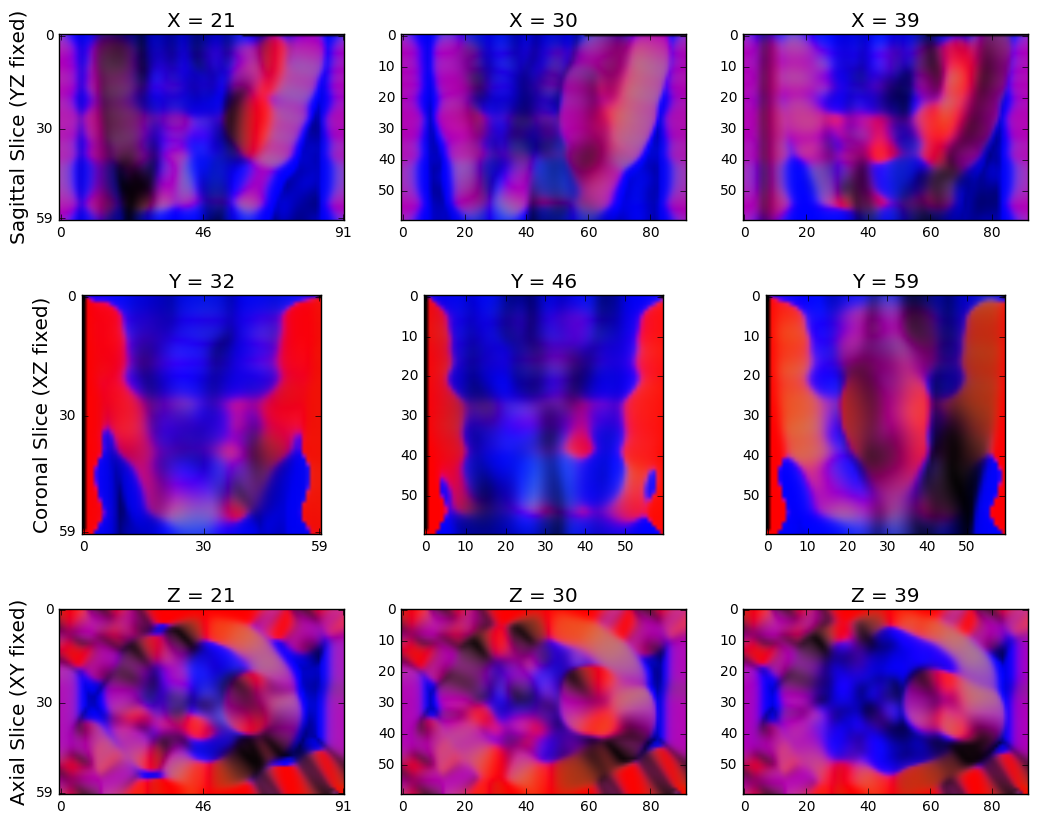

In [27]:
fig = plot_rgb(im)

In [28]:
import os

In [29]:
ls

dogsigma_0gausigma_0tensorfsl.nii  downsampled28.tiff  downsampled48.tiff
downsampled0.tiff                  downsampled29.tiff  downsampled49.tiff
downsampled1.tiff                  downsampled3.tiff   downsampled5.tiff
downsampled10.tiff                 downsampled30.tiff  downsampled50.tiff
downsampled11.tiff                 downsampled31.tiff  downsampled51.tiff
downsampled12.tiff                 downsampled32.tiff  downsampled52.tiff
downsampled13.tiff                 downsampled33.tiff  downsampled53.tiff
downsampled14.tiff                 downsampled34.tiff  downsampled54.tiff
downsampled15.tiff                 downsampled35.tiff  downsampled55.tiff
downsampled16.tiff                 downsampled36.tiff  downsampled56.tiff
downsampled17.tiff                 downsampled37.tiff  downsampled57.tiff
downsampled18.tiff                 downsampled38.tiff  downsampled58.tiff
downsampled19.tiff                 downsampled39.tiff  downsampled59.tiff
downsampled2.tiff                  down

In [31]:
ls

Aut1367.nii                        final.ipynb
Final Downsampled.ipynb            index.html
Final Downsampled2.ipynb           miniTIFF/
Final Notebook.ipynb               new/
Full Brain Less Downsampled.ipynb  pipeline.ipynb
Full Brain.ipynb                   prototype.ipynb
TIFF_stack/                        result/
Untitled-Copy1.ipynb               sample0.tiff
Untitled.ipynb                     sample1.tiff
bigtiff/                           sample2.tiff
downsampled/                       sample3.tiff
downsampled.nii                    seelviz/
downsampled0.tiff                  supernew/
downsampled1.tiff                  tensor_rgb_upper.nii.gz
downsampled2.tiff                  tmp/
downsampled3.tiff                  v100_ch0_tensorfsl_dogsig1_gausig2.3.nii


In [36]:
cd ~/supernew/

/root/supernew


In [37]:
ls

dogsigma_0gausigma_0tensorfsl.nii  downsampled28.tiff  downsampled48.tiff
downsampled0.tiff                  downsampled29.tiff  downsampled49.tiff
downsampled1.tiff                  downsampled3.tiff   downsampled5.tiff
downsampled10.tiff                 downsampled30.tiff  downsampled50.tiff
downsampled11.tiff                 downsampled31.tiff  downsampled51.tiff
downsampled12.tiff                 downsampled32.tiff  downsampled52.tiff
downsampled13.tiff                 downsampled33.tiff  downsampled53.tiff
downsampled14.tiff                 downsampled34.tiff  downsampled54.tiff
downsampled15.tiff                 downsampled35.tiff  downsampled55.tiff
downsampled16.tiff                 downsampled36.tiff  downsampled56.tiff
downsampled17.tiff                 downsampled37.tiff  downsampled57.tiff
downsampled18.tiff                 downsampled38.tiff  downsampled58.tiff
downsampled19.tiff                 downsampled39.tiff  downsampled59.tiff
downsampled2.tiff                  down

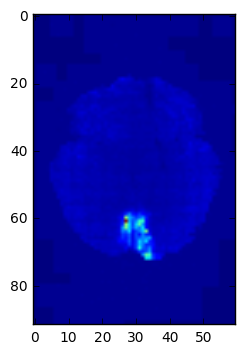

In [38]:
from PIL import Image
im = plt.imread('downsampled30.tiff') 
plt.imshow(im)

In [37]:
FA.shape

(6, 10, 6, 3)